In [44]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

### 1. return

In [139]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
# change algorithm to either td3 or ppo
#----------------------------------------------------

import glob
# interval = ["point125","point25","point5","point75"]
# interval = ["vzero","vpoint1","vpoint3"]

# itv = interval[0]
itv = "one"
algorithm = "ddpg" # "ppo"
visitors = "single"  # single
network = "64_64_NN" # 300_NN or 64_64_NN or 300_300_NN
# txt_dir = "../SHARCNET/Results/"+visitors + "/" + algorithm + "/" + network+"/new_64batchsize/"+itv+"/"
txt_dir = "../SHARCNET/Results/single/ddpg/64_64_NN/new/"+itv+"/"
# txt_dir = "../SHARCNET/Results/single/ddpg/64_64_NN/new/one/"

# pic_dir = "./plots_for_thesis/"+visitors+"/"+algorithm+"/" + network+"/new_64batchsize/"
pic_dir = "./plots_for_thesis/"+visitors+"/ddpg/64_64_NN/new/"
# pic_dir = "./plots_for_thesis/"+visitors+"/aug_obs/ddpg/new/"
# pic_dir = "./plots_for_thesis/single/ddpg/64_64_NN/new/"
modes = ["SARA","PLA"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(txt_dir+mode+ "/**/" +"*.txt", recursive=True)
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 8 files found
../SHARCNET/Results/single/ddpg/64_64_NN/new/one/SARA\2019-10-28-144314-0-0\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_NN/new/one/SARA\2019-10-28-144314-0-11\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_NN/new/one/SARA\2019-10-28-144314-1-0\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_NN/new/one/SARA\2019-10-28-144314-1-10\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_NN/new/one/SARA\2019-10-28-144927-0-20\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_NN/new/one/SARA\2019-10-28-144927-1-20\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_NN/new/one/SARA\2019-10-28-145503-0-30\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_NN/new/one/SARA\2019-10-28-145503-1-30\ddpg\ddpg_s0\progress.txt
PLA: 6 files found
../SHARCNET/Results/single/ddpg/64_64_NN/new/one/PLA\2019-10-28-144314-0-0\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_

In [140]:
txt_dir

'../SHARCNET/Results/single/ddpg/64_64_NN/new/one/'

In [141]:
# all_data_files["PLA"] = all_data_files["PLA"][:5]
all_data_files["SARA"] = np.delete(all_data_files["SARA"],2)
all_data_files["PLA"] = np.delete(all_data_files["PLA"],3)

In [142]:
all_combined_data = dict()
if algorithm == "ppo":
    metrics = ["AverageEpRet", "AverageVVals"]
    col_names = ["return", "V_means"]
elif algorithm == "ddpg":
    metrics = ["AverageEpRet", "AverageQVals"]
    col_names = ["return", "Q_means"]
else:
    metrics = ["AverageEpRet", "AverageQ1Vals", "AverageQ2Vals"]
    col_names = ["return","Q1_means","Q2_means"]
for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file, sep="\t"))
    
    mode_combined_data = pd.DataFrame()
    for metric, col_name in zip(metrics, col_names):
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[col_name+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[col_name+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[col_name+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [143]:
all_combined_data['PLA']

,return_run0,return_run1,return_run2,return_run3,return_run4,return_avg,return_std,Q_means_run0,Q_means_run1,Q_means_run2,Q_means_run3,Q_means_run4,Q_means_avg,Q_means_std
0,3.752952,3.254196,8.307645,3.932897,7.255395,5.300617,2.064807,0.124805,0.099845,0.223298,0.157281,0.271484,0.175343,0.063440
1,8.229535,12.731309,8.816844,7.243284,6.746554,8.753505,2.117078,0.211855,0.308355,0.316070,0.215869,0.295085,0.269447,0.045896
2,8.269948,12.567672,7.076719,10.116261,4.150729,8.436266,2.833117,0.280390,0.400384,0.346643,0.316957,0.277560,0.324387,0.045727
3,4.216851,8.726194,9.772530,6.269533,13.432400,8.483501,3.140639,0.290756,0.457346,0.394716,0.354166,0.382989,0.375995,0.054331
4,10.416653,13.423026,5.764429,10.939665,8.779292,9.864613,2.534254,0.379426,0.551092,0.418149,0.467241,0.486557,0.460493,0.058818
5,7.880191,11.792206,5.701847,8.113551,7.507713,8.199102,1.986641,0.410808,0.644350,0.442501,0.545617,0.569292,0.522513,0.085377
6,14.825688,4.280216,8.351338,15.280494,7.607466,10.069040,4.296633,0.526901,0.719462,0.481062,0.687007,0.655618,0.614010,0.093213
7,6.531944,4.595451,7.101263,13.589336,4.457142,7.255027,3.333811,0.597917,0.757442,0.534962,0.801132,0.694218,0.677134,0.098595
8,9.239972,4.659216,10.637795,12.522965,2.839363,7.979862,3.653593,0.679592,0.764993,0.609794,0.893890,0.725344,0.734723,0.094852
9,10.302203,8.827653,11.023461,13.297568,7.539693,10.198116,1.961836,0.762606,0.795719,0.677950,0.991737,0.773009,0.800204,0.103734


save to ./plots_for_thesis/single/ddpg/64_64_NN/new/
save to ./plots_for_thesis/single/ddpg/64_64_NN/new/


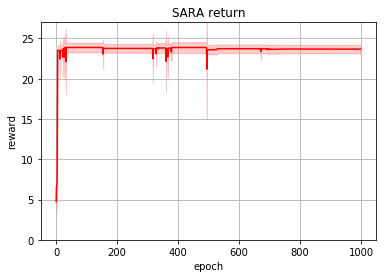

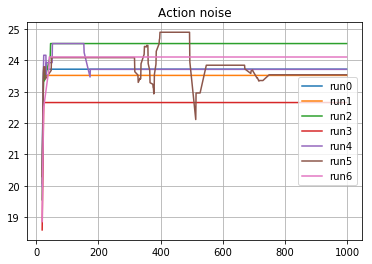

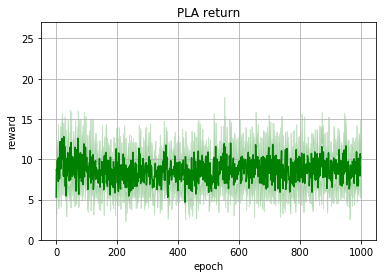

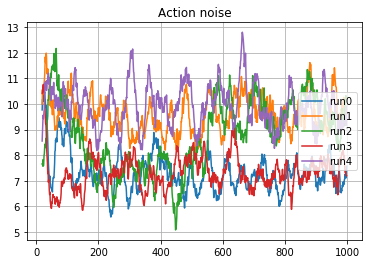

In [146]:
# Plot return
colors = ['r','g','b']
metric = "return"
modes = ["SARA","PLA"]

if visitors == "single":
    ylim = [0,27]
else:
    ylim = [0,125]
for mode, c in zip(modes, colors):

    data = all_combined_data[mode]
    length = data.shape[0]
    if length == 0:
        print("No data from {}".format(mode))
        continue
#     label = "[0, "+itv.replace("point","0.")+"]"
    label = "eps="+itv.replace("vpoint","0.").replace("vzero", "0")
    
    plt.figure()
    plt.grid()
    plt.fill_between(data.index, data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(data.index, data[metric+'_avg'], '-', color=c,
         label=label)
#     plt.legend(loc="best")
    plt.ylim(ylim)
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(pic_dir+"{}_{}_{}.png".format(itv,mode,metric), bbox_inches='tight')
    print("save to {}".format(pic_dir))
    
    plt.figure()
    plt.grid()
    for i in range(len(all_data_files[mode])):
        plt.plot(data.index, data[metric+'_run'+str(i)].rolling(window=20).mean(), '-', label="run"+str(i))
    plt.legend(loc="right")
    plt.title("Action noise")
    plt.savefig(pic_dir+"{}_{}_{}_allrun.png".format(itv,mode,metric), bbox_inches='tight')
    

### 2. V_mean

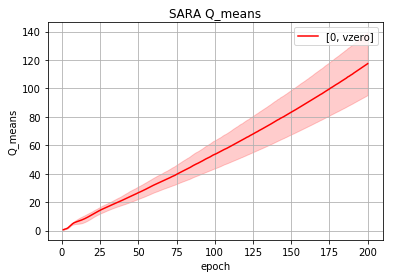

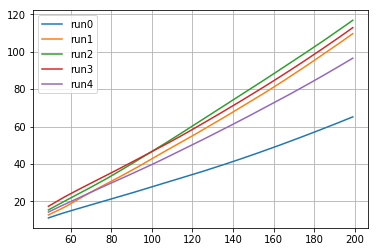

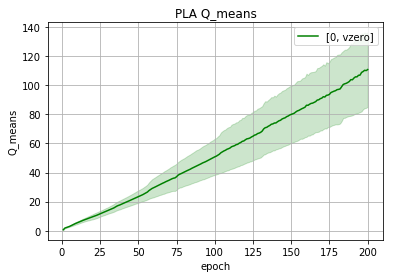

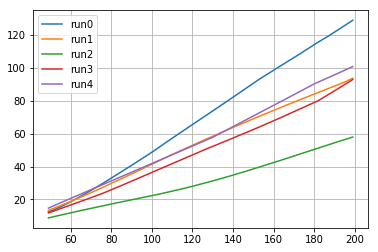

In [37]:
from matplotlib.colors import LogNorm
colors = ['r','g','b']
metric = "Q_means"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):

    data = all_combined_data[mode]
    length = data.shape[0]
    if length == 0:
        print("No data from {}".format(mode))
        continue
    label = "[0, "+itv.replace("point","0.")+"]"
    
    plt.figure()
    plt.grid()
    plt.fill_between(np.linspace(1,length,length)[:200], data[metric+"_avg"][:200] - data[metric+"_std"][:200],
                 data[metric+'_avg'][:200] + data[metric+'_std'][:200], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,length,length)[:200], data[metric+'_avg'][:200], '-', color=c, label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel(metric)
    plt.savefig(pic_dir+'/{}_{}_{}.png'.format(itv,mode,metric), bbox_inches='tight')
    
    
    plt.figure()
    plt.grid()
    for i in range(0,len(all_data_files[mode])):
        plt.plot(data.index[:200], data[metric+'_run'+str(i)][:200].rolling(window=50).mean(), '-', label="run"+str(i))
    plt.legend(loc="best")

    

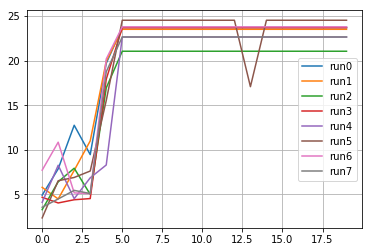

In [90]:
metric="return"
mode="SARA"
plt.figure()
plt.grid()
data = all_combined_data[mode]
for i in range(len(all_data_files[mode])):
    plt.plot(data.index[:20], data[metric+'_run'+str(i)][:20].rolling(window=1).mean(), '-', label="run"+str(i))
plt.legend(loc="right")

# combine different randomness

In [79]:
import glob
interval = ["vzero","vpoint01","vpoint05","vpoint1","vpoint3"]

# itv = "one"
algorithm = "ddpg" # "ppo"
visitors = "single"  # single
txt_dir = "../SHARCNET/Results/multi/lazy_visitor_sq_action/new/"
pic_dir = "./plots_for_thesis/multi/lazy_visitor_sq_action/new_all_eps_combined/"

modes = ["SARA","PLA"]
all_data_files = dict()
for itv in interval:
    itv_data_files = dict()
    for mode in modes:
        mode_data_files = glob.glob(txt_dir+"/"+itv+"/"+mode+ "/**/" +"*.txt", recursive=True)
        mode_data_files.sort()
        print("{} {}: {} files found".format(itv, mode,len(mode_data_files)))
        for f in mode_data_files:
            print(f)
        itv_data_files[mode]=mode_data_files
    all_data_files[itv] = itv_data_files

vzero SARA: 5 files found
../SHARCNET/Results/multi/lazy_visitor_sq_action/new//vzero/SARA\2019-11-14-172743-0-0\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/multi/lazy_visitor_sq_action/new//vzero/SARA\2019-11-14-172743-1-0\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/multi/lazy_visitor_sq_action/new//vzero/SARA\2019-11-16-161526-0-90\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/multi/lazy_visitor_sq_action/new//vzero/SARA\2019-11-16-161526-2-90\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/multi/lazy_visitor_sq_action/new//vzero/SARA\2019-11-16-161529-1-90\ddpg\ddpg_s0\progress.txt
vzero PLA: 6 files found
../SHARCNET/Results/multi/lazy_visitor_sq_action/new//vzero/PLA\2019-11-14-172743-0-0\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/multi/lazy_visitor_sq_action/new//vzero/PLA\2019-11-14-172743-1-0\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/multi/lazy_visitor_sq_action/new//vzero/PLA\2019-11-14-172743-2-0\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/multi/lazy_visitor_sq_act

In [80]:
all_combined_data = dict()
if algorithm == "ppo":
    metrics = ["AverageEpRet", "AverageVVals"]
    col_names = ["return", "V_means"]
elif algorithm == "ddpg":
    metrics = ["AverageEpRet", "AverageQVals"]
    col_names = ["return", "Q_means"]
else:
    metrics = ["AverageEpRet", "AverageQ1Vals", "AverageQ2Vals"]
    col_names = ["return","Q1_means","Q2_means"]
for itv in interval:
    all_combined_data[itv] = dict()
    for mode in modes:

        mode_data = []
        for file in all_data_files[itv][mode]:
            if os.stat(file).st_size == 0:
                print("{} no data".format(file))
            else:
                mode_data.append(pd.read_csv(file, sep="\t"))

        mode_combined_data = pd.DataFrame()
        for metric, col_name in zip(metrics, col_names):
            metric_combined_data = pd.DataFrame()
            for i in range(len(all_data_files[itv][mode])):
                metric_combined_data[col_name+"_run"+str(i)] = mode_data[i][metric]
            metric_combined_data[col_name+"_avg"] = metric_combined_data.mean(axis=1)
            metric_combined_data[col_name+'_std'] = metric_combined_data.std(axis=1)

            mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
        all_combined_data[itv][mode] = mode_combined_data

In [81]:
all_combined_data["vzero"]["SARA"]

,return_run0,return_run1,return_run2,return_run3,return_run4,return_avg,return_std,Q_means_run0,Q_means_run1,Q_means_run2,Q_means_run3,Q_means_run4,Q_means_avg,Q_means_std
0,20.987244,20.487320,17.102057,14.881509,14.092820,17.510190,2.818090,0.811498,0.754189,0.545358,0.465546,0.588033,0.632925,0.129840
1,35.841194,35.455704,32.314190,32.549370,42.946450,35.821382,3.844663,1.181376,1.139031,0.934573,0.868682,1.165804,1.057893,0.129988
2,33.387367,35.904217,27.109358,38.793950,27.246763,32.488331,4.661432,1.469600,1.470165,1.118464,1.265265,1.443156,1.353330,0.140111
3,52.501550,30.491880,33.186752,33.254646,32.208430,36.328652,8.147734,2.343440,1.900767,1.559669,1.722015,2.132097,1.931598,0.280364
4,23.835669,31.944880,59.524277,66.191380,46.693764,45.637994,15.995174,3.244251,2.637890,2.532790,2.746895,3.215044,2.875374,0.297226
5,27.835712,52.366116,72.186140,101.740170,48.709755,60.567579,24.937603,3.976670,3.388552,3.692114,4.293184,4.246288,3.919362,0.341558
6,35.309310,52.347946,71.946060,114.233220,48.848183,64.536944,27.472089,4.492310,3.826717,4.699960,5.822645,5.273678,4.823062,0.681098
7,47.098907,45.764950,86.764430,114.233220,45.721878,67.916677,27.989811,5.117893,3.944557,5.444937,7.004676,6.002001,5.502813,1.008410
8,46.676830,48.144745,93.520190,87.891900,41.621674,63.571068,22.332109,5.580326,3.883278,6.055564,7.795793,6.546900,5.972372,1.279053
9,46.210400,5.820953,94.832070,90.284250,28.681600,53.165855,34.650384,6.083253,3.645464,6.654253,8.543346,6.869392,6.359142,1.584825


save to ./plots_for_thesis/multi/lazy_visitor_sq_action/new_all_eps_combined/
save to ./plots_for_thesis/multi/lazy_visitor_sq_action/new_all_eps_combined/


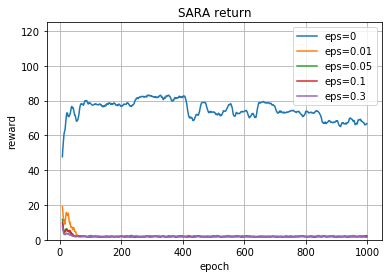

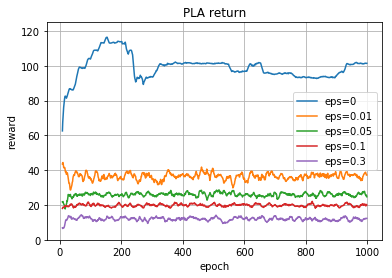

In [82]:
# Plot return
metric = "return"
modes = ["SARA","PLA"]
for mode in modes:
    

    plt.figure()
    plt.grid()
    for itv in interval:
        label = "eps="+itv.replace("vpoint","0.").replace("vzero", "0")
        plt.plot(all_combined_data[itv][mode].index, all_combined_data[itv][mode][metric+'_avg'].rolling(window=10).mean(), '-', label=label)
    plt.legend(loc="best")
    plt.ylim([0,125])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(pic_dir+"all_eps_combined_{}_{}.png".format(mode,metric), bbox_inches='tight')
    print("save to {}".format(pic_dir))

# Combine different difficulties

In [89]:
import glob
interval = ["point125","point25","point75", "vzero"]

# itv = "one"
algorithm = "ddpg" # "ppo"
visitors = "single"  # single
txt_dir = "../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/"
pic_dir = "./plots_for_thesis/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/all_difficulty_combined/"

modes = ["SARA","PLA"]
all_data_files = dict()
for itv in interval:
    itv_data_files = dict()
    for mode in modes:
        mode_data_files = glob.glob(txt_dir+"/"+itv+"/"+mode+ "/**/" +"*.txt", recursive=True)
        mode_data_files.sort()
        print("{} {}: {} files found".format(itv, mode,len(mode_data_files)))
        for f in mode_data_files:
            print(f)
        itv_data_files[mode]=mode_data_files
    all_data_files[itv] = itv_data_files

point125 SARA: 2 files found
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action//point125/SARA\2019-11-18-001541-0-0\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action//point125/SARA\2019-11-18-001541-1-0\ddpg\ddpg_s0\progress.txt
point125 PLA: 2 files found
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action//point125/PLA\2019-11-18-001537-0-0\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action//point125/PLA\2019-11-18-001541-1-0\ddpg\ddpg_s0\progress.txt
point25 SARA: 3 files found
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action//point25/SARA\2019-11-18-001543-0-32\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action//point25/SARA\2019-11-18-001543-1-31\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action//point25/SARA\2019-11-18-001543-2-30\ddpg\ddpg_s0\progress.txt


In [90]:
all_combined_data = dict()
if algorithm == "ppo":
    metrics = ["AverageEpRet", "AverageVVals"]
    col_names = ["return", "V_means"]
elif algorithm == "ddpg":
    metrics = ["AverageEpRet", "AverageQVals"]
    col_names = ["return", "Q_means"]
else:
    metrics = ["AverageEpRet", "AverageQ1Vals", "AverageQ2Vals"]
    col_names = ["return","Q1_means","Q2_means"]
for itv in interval:
    all_combined_data[itv] = dict()
    for mode in modes:

        mode_data = []
        for file in all_data_files[itv][mode]:
            if os.stat(file).st_size == 0:
                print("{} no data".format(file))
            else:
                mode_data.append(pd.read_csv(file, sep="\t"))

        mode_combined_data = pd.DataFrame()
        for metric, col_name in zip(metrics, col_names):
            metric_combined_data = pd.DataFrame()
            for i in range(len(all_data_files[itv][mode])):
                if mode_data[i][metric].shape[0] < 1000:
                    print("file size {}".format(mode_data[i][metric].shape[0]))
                metric_combined_data[col_name+"_run"+str(i)] = mode_data[i][metric]
            metric_combined_data[col_name+"_avg"] = metric_combined_data.mean(axis=1)
            metric_combined_data[col_name+'_std'] = metric_combined_data.std(axis=1)

            mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
        all_combined_data[itv][mode] = mode_combined_data

file size 627
file size 664
file size 627
file size 664
file size 701
file size 627
file size 701
file size 627
file size 678
file size 638
file size 634
file size 678
file size 638
file size 634
file size 632
file size 638
file size 636
file size 632
file size 638
file size 636
file size 652
file size 629
file size 634
file size 652
file size 629
file size 634
file size 661
file size 661
file size 994
file size 999
file size 999
file size 994
file size 999
file size 999
file size 999
file size 999
file size 999
file size 999
file size 999
file size 999


save to ./plots_for_thesis/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/all_difficulty_combined/
save to ./plots_for_thesis/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/all_difficulty_combined/


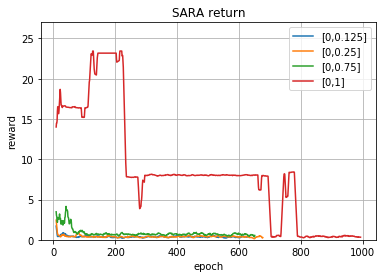

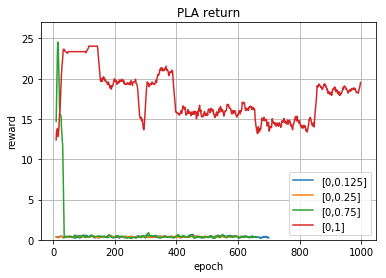

In [91]:
# Plot return
metric = "return"
modes = ["SARA","PLA"]
if visitors == "single":
    ylim = [0, 27]
else:
    ylim = [0, 125]
for mode in modes:
    

    plt.figure()
    plt.grid()
    for itv in interval:
        if itv == "vzero":
            label = "[0,1]"
        else:
            label = "[0,"+itv.replace("point","0.").replace("one", "1")+"]"
        plt.plot(all_combined_data[itv][mode].index, all_combined_data[itv][mode][metric+'_avg'].rolling(window=10).mean(), '-', label=label)
    plt.legend(loc="best")
    plt.ylim(ylim)
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(pic_dir+"all_difficulty_combined_{}_{}.png".format(mode,metric), bbox_inches='tight')
    print("save to {}".format(pic_dir))